In [1]:
import json
import os
from collections import defaultdict
from typing import Dict, List
import pandas as pd
from tqdm import tqdm

In [65]:
# 판다스 옵션 설정: 모든 열과 행 출력
pd.set_option('display.max_rows', None)  # 모든 행 표시
# pd.set_option('display.max_columns', None)  # 모든 열 표시
# pd.set_option('display.width', None)  # 출력 폭 제한 해제
# pd.set_option('display.max_colwidth', None)  # 열 너비 제한 해제

In [67]:
pd.reset_option('display.max_rows')

In [2]:
from matplotlib import font_manager, rc

# 폰트 경로 설정, 그래프 style은 사용 x
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
font_manager.fontManager.addfont(font_path)
rc('font', family='Malgun Gothic')

In [3]:
meta_path = 'C:\\Users\\min94\\Desktop\\유형별두피이미지\\Meta\\META_DATA'

In [4]:
# 파일 이름에서 특정 패턴까지 추출하는 함수
def extract_filename_part(filename):
    # 파일명을 '_'로 분할하여 3번째 구분자까지 추출
    parts = filename.split('_', 3)[:3]  
    # 다시 '_'로 합쳐서 반환
    return '_'.join(parts)

### 접기

In [16]:
# 데이터가 있는 디렉터리
path = 'C:\\Users\\min94\\Desktop\\유형별두피이미지\\Meta\\META_DATA'

# 경로 내에 파일을 모두 불러옴
file_list = os.listdir(path)

# json 확장자를 가진 파일로 새로운 리스트 생성
json_file_list = [file for file in file_list if file.endswith('.json')]

DataFrame = []
# tqdm 적용하여 JSON 파일 처리 진행 상황을 표시
for j in tqdm(json_file_list, desc="Processing JSON files"):
    with open(f"{path}/{j}", 'r', encoding='utf-8') as f:
        js = json.load(f)
        
        # 파일 이름 정보 추가
        js['filename'] = j
        js['matching_id'] = j.replace('.json', '')
        DataFrame.append(js)

df = pd.DataFrame(DataFrame)

df.columns = ["성별", "나이", "사진 위치", "질문1", "샴푸 사용 빈도", "질문2", "펌 주기", "질문3", "염색 주기", "질문4",
             "현재 모발 상태", "질문5", "사용 중인 두피모발 제품", "질문6", "두피케어제품 사용 희망", "질문7", 
             "샴푸 구매시 중요 고려 사항", "filename", "matching_id"]

# 불필요한 컬럼 제거 (inplace=True 추가하여 실제로 적용되도록 함)
df = df.drop(["질문1", "질문2", "질문3", "질문4", "질문5", "질문6", "질문7"], axis=1, inplace=False)

# 결과 확인
print("데이터 크기:", df.shape)
print("\n처음 5개 행의 filename과 matching_id:")
print(df[['filename', 'matching_id']].head())

# CSV 파일로 저장
output_path = './meta_data.csv'  # 저장할 파일 경로와 이름
df.to_csv(output_path, index=False, encoding='utf-8-sig')  # utf-8-sig로 인코딩하여 한글이 깨지지 않도록 함

Processing JSON files: 100%|██████████| 101027/101027 [11:26<00:00, 147.27it/s] 


데이터 크기: (101027, 12)

처음 5개 행의 filename과 matching_id:
                                            filename  \
0  0013_A2LEBJJDE00060O_1602578303771_2_TH_META.json   
1  0013_A2LEBJJDE00060O_1602578303771_3_TH_META.json   
2  0013_A2LEBJJDE00060O_1602578303771_4_LH_META.json   
3  0013_A2LEBJJDE00060O_1602578303771_5_RH_META.json   
4  0013_A2LEBJJDE00060O_1602578303771_6_BH_META.json   

                                    matching_id  
0  0013_A2LEBJJDE00060O_1602578303771_2_TH_META  
1  0013_A2LEBJJDE00060O_1602578303771_3_TH_META  
2  0013_A2LEBJJDE00060O_1602578303771_4_LH_META  
3  0013_A2LEBJJDE00060O_1602578303771_5_RH_META  
4  0013_A2LEBJJDE00060O_1602578303771_6_BH_META  


In [17]:
# 데이터가 있는 디렉터리
path = 'C:\\Users\\min94\\Desktop\\유형별두피이미지\\Training\\label'

# 경로 내에 파일을 모두 불러옴
label_list = os.listdir(path)

# json 확장자를 가진 파일로 새로운 리스트 생성
json_label_list = [label for label in label_list if label.endswith('.json')]

DataFrame = []
# tqdm 적용하여 JSON 파일 처리 진행 상황을 표시
for j in tqdm(json_label_list, desc="Processing label JSON files"):
    with open(f"{path}/{j}", 'r', encoding='utf-8') as f:
        js = json.load(f)
        
        # 기존 데이터 그대로 사용
        DataFrame.append(js)

df = pd.DataFrame(DataFrame)

# 새로운 JSON 구조에 맞는 컬럼명
df.columns = ["image_id", "image_file_name", "value_1", "value_2", "value_3", 
              "value_4", "value_5", "value_6"]

# 결과 확인
print("데이터 크기:", df.shape)
print("\n처음 5개 행:")
print(df.head())

# CSV 파일로 저장
output_path = './image_labels.csv'  # 저장할 파일 경로와 이름
df.to_csv(output_path, index=False, encoding='utf-8-sig')  # utf-8-sig로 인코딩하여 한글이 깨지지 않도록 함

print(f"\nCSV 파일이 저장되었습니다: {output_path}")

Processing label JSON files: 100%|██████████| 72342/72342 [18:45<00:00, 64.27it/s] 


데이터 크기: (72342, 8)

처음 5개 행:
                               image_id  \
0  0013_A2LEBJJDE00060O_1602578303771_2   
1  0013_A2LEBJJDE00060O_1602578303771_3   
2  0013_A2LEBJJDE00060O_1602578303771_4   
3  0013_A2LEBJJDE00060O_1602578303771_5   
4  0013_A2LEBJJDE00060O_1602578303771_6   

                               image_file_name value_1 value_2 value_3  \
0  0013_A2LEBJJDE00060O_1602578303771_2_TH.jpg       0       1       2   
1  0013_A2LEBJJDE00060O_1602578303771_3_TH.jpg       0       2       3   
2  0013_A2LEBJJDE00060O_1602578303771_4_LH.jpg       0       2       2   
3  0013_A2LEBJJDE00060O_1602578303771_5_RH.jpg       0       2       3   
4  0013_A2LEBJJDE00060O_1602578303771_6_BH.jpg       0       2       2   

  value_4 value_5 value_6  
0       0       1       0  
1       0       0       0  
2       0       0       0  
3       0       0       0  
4       0       0       0  

CSV 파일이 저장되었습니다: ./image_labels.csv


In [18]:
meta = pd.read_csv('./meta_data.csv', encoding='utf-8')

In [21]:
label = pd.read_csv('./image_labels.csv', encoding='utf-8')

In [24]:
label['img_file'] = label['image_file_name'].str.replace('.jpg', '', regex=False)

In [25]:
label

,image_id,image_file_name,value_1,value_2,value_3,value_4,value_5,value_6,img_file
0,0013_A2LEBJJDE00060O_1602578303771_2,0013_A2LEBJJDE00060O_1602578303771_2_TH.jpg,0,1,2,0,1,0,0013_A2LEBJJDE00060O_1602578303771_2_TH
1,0013_A2LEBJJDE00060O_1602578303771_3,0013_A2LEBJJDE00060O_1602578303771_3_TH.jpg,0,2,3,0,0,0,0013_A2LEBJJDE00060O_1602578303771_3_TH
2,0013_A2LEBJJDE00060O_1602578303771_4,0013_A2LEBJJDE00060O_1602578303771_4_LH.jpg,0,2,2,0,0,0,0013_A2LEBJJDE00060O_1602578303771_4_LH
3,0013_A2LEBJJDE00060O_1602578303771_5,0013_A2LEBJJDE00060O_1602578303771_5_RH.jpg,0,2,3,0,0,0,0013_A2LEBJJDE00060O_1602578303771_5_RH
4,0013_A2LEBJJDE00060O_1602578303771_6,0013_A2LEBJJDE00060O_1602578303771_6_BH.jpg,0,2,2,0,0,0,0013_A2LEBJJDE00060O_1602578303771_6_BH
...,...,...,...,...,...,...,...,...,...
72337,9905_A2LEBJJDE00042M_1606203543720_5,9905_A2LEBJJDE00042M_1606203543720_5_RH.jpg,0,1,3,0,0,1,9905_A2LEBJJDE00042M_1606203543720_5_RH
72338,9905_A2LEBJJDE00042M_1606457064410_2,9905_A2LEBJJDE00042M_1606457064410_2_TH.jpg,3,0,0,0,0,0,9905_A2LEBJJDE00042M_1606457064410_2_TH
72339,9905_A2LEBJJDE00042M_1606457064410_3,9905_A2LEBJJDE00042M_1606457064410_3_TH.jpg,3,0,1,0,0,0,9905_A2LEBJJDE00042M_1606457064410_3_TH
72340,9905_A2LEBJJDE00042M_1606457064410_5,9905_A2LEBJJDE00042M_1606457064410_5_RH.jpg,3,0,1,0,2,0,9905_A2LEBJJDE00042M_1606457064410_5_RH


In [26]:
meta['matching_id'] = meta['matching_id'].str.replace('_META', '', regex=False)

In [104]:
# 두 데이터프레임 병합
merged_df = pd.merge(meta, label, left_on='matching_id', right_on='img_file', how='left')

In [33]:
merged_df.to_csv('./merge_data_label.csv', encoding='utf-8-sig', index=False)

In [105]:
merged_df = merged_df.dropna(subset=['value_1'])

In [106]:
merged_df

,성별,나이,사진 위치,샴푸 사용 빈도,펌 주기,염색 주기,현재 모발 상태,사용 중인 두피모발 제품,두피케어제품 사용 희망,샴푸 구매시 중요 고려 사항,...,matching_id,image_id,image_file_name,value_1,value_2,value_3,value_4,value_5,value_6,img_file
0,남,40대,TH,1일 1회,하지않음,하지않음,기타,샴푸,예,헹굼후느낌,...,0013_A2LEBJJDE00060O_1602578303771_2_TH,0013_A2LEBJJDE00060O_1602578303771_2,0013_A2LEBJJDE00060O_1602578303771_2_TH.jpg,0.0,1.0,2.0,0.0,1.0,0.0,0013_A2LEBJJDE00060O_1602578303771_2_TH
1,남,40대,TH,1일 1회,하지않음,하지않음,기타,샴푸,예,헹굼후느낌,...,0013_A2LEBJJDE00060O_1602578303771_3_TH,0013_A2LEBJJDE00060O_1602578303771_3,0013_A2LEBJJDE00060O_1602578303771_3_TH.jpg,0.0,2.0,3.0,0.0,0.0,0.0,0013_A2LEBJJDE00060O_1602578303771_3_TH
2,남,40대,LH,1일 1회,하지않음,하지않음,기타,샴푸,예,헹굼후느낌,...,0013_A2LEBJJDE00060O_1602578303771_4_LH,0013_A2LEBJJDE00060O_1602578303771_4,0013_A2LEBJJDE00060O_1602578303771_4_LH.jpg,0.0,2.0,2.0,0.0,0.0,0.0,0013_A2LEBJJDE00060O_1602578303771_4_LH
3,남,40대,RH,1일 1회,하지않음,하지않음,기타,샴푸,예,헹굼후느낌,...,0013_A2LEBJJDE00060O_1602578303771_5_RH,0013_A2LEBJJDE00060O_1602578303771_5,0013_A2LEBJJDE00060O_1602578303771_5_RH.jpg,0.0,2.0,3.0,0.0,0.0,0.0,0013_A2LEBJJDE00060O_1602578303771_5_RH
4,남,40대,BH,1일 1회,하지않음,하지않음,기타,샴푸,예,헹굼후느낌,...,0013_A2LEBJJDE00060O_1602578303771_6_BH,0013_A2LEBJJDE00060O_1602578303771_6,0013_A2LEBJJDE00060O_1602578303771_6_BH.jpg,0.0,2.0,2.0,0.0,0.0,0.0,0013_A2LEBJJDE00060O_1602578303771_6_BH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100932,남,30대,RH,1일 1회,7회 이상/연,1~3회/연,염색 모발,샴푸,아니오,헹굼후느낌,...,9905_A2LEBJJDE00042M_1606203543720_5_RH,9905_A2LEBJJDE00042M_1606203543720_5,9905_A2LEBJJDE00042M_1606203543720_5_RH.jpg,0.0,1.0,3.0,0.0,0.0,1.0,9905_A2LEBJJDE00042M_1606203543720_5_RH
100939,여,20대,TH,2일 1회,하지않음,7회 이상/연,염색 모발,"샴푸,헤어에센스,트리트먼트,린스,헤어 스타일링제",예,머리결,...,9905_A2LEBJJDE00042M_1606457064410_2_TH,9905_A2LEBJJDE00042M_1606457064410_2,9905_A2LEBJJDE00042M_1606457064410_2_TH.jpg,3.0,0.0,0.0,0.0,0.0,0.0,9905_A2LEBJJDE00042M_1606457064410_2_TH
100940,여,20대,TH,2일 1회,하지않음,7회 이상/연,염색 모발,"샴푸,헤어에센스,트리트먼트,린스,헤어 스타일링제",예,머리결,...,9905_A2LEBJJDE00042M_1606457064410_3_TH,9905_A2LEBJJDE00042M_1606457064410_3,9905_A2LEBJJDE00042M_1606457064410_3_TH.jpg,3.0,0.0,1.0,0.0,0.0,0.0,9905_A2LEBJJDE00042M_1606457064410_3_TH
100942,여,20대,RH,2일 1회,하지않음,7회 이상/연,염색 모발,"샴푸,헤어에센스,트리트먼트,린스,헤어 스타일링제",예,머리결,...,9905_A2LEBJJDE00042M_1606457064410_5_RH,9905_A2LEBJJDE00042M_1606457064410_5,9905_A2LEBJJDE00042M_1606457064410_5_RH.jpg,3.0,0.0,1.0,0.0,2.0,0.0,9905_A2LEBJJDE00042M_1606457064410_5_RH


In [107]:
merged_data = merged_df.drop(columns=['filename', 'matching_id','image_file_name', 'img_file'])

In [110]:
merged_data.to_csv('./병합파일_merged_data.csv', encoding='utf-8-sig', index=False)

In [ ]:
['value_1', 'value_2', 'value_3', 'value_4', 'value_5', 'value_6']
각질, 피지, 홍반, 농포, 비듬, 탈모

In [56]:
merged_data = merged_data.rename(columns={'value_1':'각질', 'value_2':'피지', 'value_3':'홍반', 'value_4':'농포', 'value_5':'비듬', 'value_6':'탈모'})

In [ ]:
# '각질', '피지', '홍반', '농포', '비듬', '탈모'

In [84]:
# 성별과 각질 중증도에 따른 사람 수 계산
gakjil_count = merged_data.groupby(['성별', '각질']).size().reset_index(name='count')

# 성별별 전체 인원 수 계산
total_by_gender = merged_data.groupby('성별').size().reset_index(name='total_count')

In [85]:
gakjil_count = gakjil_count.merge(total_by_gender, on='성별')

In [95]:
gakjil_count['ratio'] = (gakjil_count['count'] / gakjil_count['total_count']) * 100

In [96]:
gakjil_count

,성별,각질,count,total_count,ratio
0,남,0.0,25051,30808,81.313295
1,남,1.0,2163,30808,7.020904
2,남,2.0,2573,30808,8.351727
3,남,3.0,1021,30808,3.314074
4,여,0.0,34445,41534,82.932056
5,여,1.0,2623,41534,6.315308
6,여,2.0,3183,41534,7.663601
7,여,3.0,1283,41534,3.089035


In [97]:
# 성별과 각질 중증도에 따른 사람 수 계산
pizy_count = merged_data.groupby(['성별', '피지']).size().reset_index(name='count')

# 성별별 전체 인원 수 계산
total_by_gender = merged_data.groupby('성별').size().reset_index(name='total_count')
pizy_count = pizy_count.merge(total_by_gender, on='성별')
pizy_count['ratio'] = (pizy_count['count'] / pizy_count['total_count']) * 100
pizy_count

,성별,피지,count,total_count,ratio
0,남,0.0,6911,30808,22.432485
1,남,1.0,11903,30808,38.636069
2,남,2.0,10690,30808,34.698780
3,남,3.0,1304,30808,4.232667
4,여,0.0,7842,41534,18.880917
5,여,1.0,16570,41534,39.895026
6,여,2.0,14607,41534,35.168777
7,여,3.0,2515,41534,6.055280


In [98]:
# 성별과 각질 중증도에 따른 사람 수 계산
hongban_count = merged_data.groupby(['성별', '홍반']).size().reset_index(name='count')

# 성별별 전체 인원 수 계산
total_by_gender = merged_data.groupby('성별').size().reset_index(name='total_count')
hongban_count = hongban_count.merge(total_by_gender, on='성별')
hongban_count['ratio'] = (hongban_count['count'] / hongban_count['total_count']) * 100
hongban_count

,성별,홍반,count,total_count,ratio
0,남,0.0,7191,30808,23.341340
1,남,1.0,13591,30808,44.115165
2,남,2.0,7184,30808,23.318619
3,남,3.0,2842,30808,9.224877
4,여,0.0,14314,41534,34.463331
5,여,1.0,18910,41534,45.528964
6,여,2.0,6649,41534,16.008571
7,여,3.0,1661,41534,3.999133


In [102]:
# 성별과 각질 중증도에 따른 사람 수 계산
nongpo_count = merged_data.groupby(['성별', '농포']).size().reset_index(name='count')

# 성별별 전체 인원 수 계산
total_by_gender = merged_data.groupby('성별').size().reset_index(name='total_count')
nongpo_count = nongpo_count.merge(total_by_gender, on='성별')
nongpo_count['ratio'] = (nongpo_count['count'] / nongpo_count['total_count']) * 100
nongpo_count

,성별,농포,count,total_count,ratio
0,남,0.0,28827,30808,93.569852
1,남,1.0,1305,30808,4.235913
2,남,2.0,483,30808,1.567775
3,남,3.0,193,30808,0.626461
4,여,0.0,39961,41534,96.212741
5,여,1.0,1139,41534,2.742332
6,여,2.0,295,41534,0.710261
7,여,3.0,139,41534,0.334666


In [101]:
# 성별과 각질 중증도에 따른 사람 수 계산
bidum_count = merged_data.groupby(['성별', '비듬']).size().reset_index(name='count')

# 성별별 전체 인원 수 계산
total_by_gender = merged_data.groupby('성별').size().reset_index(name='total_count')
bidum_count = bidum_count.merge(total_by_gender, on='성별')
bidum_count['ratio'] = (bidum_count['count'] / bidum_count['total_count']) * 100
bidum_count

,성별,비듬,count,total_count,ratio
0,남,0.0,19745,30808,64.090496
1,남,1.0,6543,30808,21.237990
2,남,2.0,3538,30808,11.484030
3,남,3.0,982,30808,3.187484
4,여,0.0,24092,41534,58.005489
5,여,1.0,10160,41534,24.461887
6,여,2.0,6008,41534,14.465257
7,여,3.0,1274,41534,3.067366


In [99]:
# 성별과 각질 중증도에 따른 사람 수 계산
talmo_count = merged_data.groupby(['성별', '탈모']).size().reset_index(name='count')

# 성별별 전체 인원 수 계산
total_by_gender = merged_data.groupby('성별').size().reset_index(name='total_count')
talmo_count = talmo_count.merge(total_by_gender, on='성별')
talmo_count['ratio'] = (talmo_count['count'] / talmo_count['total_count']) * 100
talmo_count

,성별,탈모,count,total_count,ratio
0,남,0.0,23383,30808,75.899117
1,남,1.0,5370,30808,17.430538
2,남,2.0,1597,30808,5.183719
3,남,3.0,458,30808,1.486627
4,여,0.0,30828,41534,74.223528
5,여,1.0,8116,41534,19.540617
6,여,2.0,2211,41534,5.323350
7,여,3.0,379,41534,0.912505


In [113]:
# `image_id`에서 고유 식별자 추출
merged_data['unique_id'] = merged_data['image_id'].str.extract(r'(^[^_]+_[^_]+_[^_]+)')
merged_data

,성별,나이,사진 위치,샴푸 사용 빈도,펌 주기,염색 주기,현재 모발 상태,사용 중인 두피모발 제품,두피케어제품 사용 희망,샴푸 구매시 중요 고려 사항,image_id,value_1,value_2,value_3,value_4,value_5,value_6,unique_id
0,남,40대,TH,1일 1회,하지않음,하지않음,기타,샴푸,예,헹굼후느낌,0013_A2LEBJJDE00060O_1602578303771_2,0.0,1.0,2.0,0.0,1.0,0.0,0013_A2LEBJJDE00060O_1602578303771
1,남,40대,TH,1일 1회,하지않음,하지않음,기타,샴푸,예,헹굼후느낌,0013_A2LEBJJDE00060O_1602578303771_3,0.0,2.0,3.0,0.0,0.0,0.0,0013_A2LEBJJDE00060O_1602578303771
2,남,40대,LH,1일 1회,하지않음,하지않음,기타,샴푸,예,헹굼후느낌,0013_A2LEBJJDE00060O_1602578303771_4,0.0,2.0,2.0,0.0,0.0,0.0,0013_A2LEBJJDE00060O_1602578303771
3,남,40대,RH,1일 1회,하지않음,하지않음,기타,샴푸,예,헹굼후느낌,0013_A2LEBJJDE00060O_1602578303771_5,0.0,2.0,3.0,0.0,0.0,0.0,0013_A2LEBJJDE00060O_1602578303771
4,남,40대,BH,1일 1회,하지않음,하지않음,기타,샴푸,예,헹굼후느낌,0013_A2LEBJJDE00060O_1602578303771_6,0.0,2.0,2.0,0.0,0.0,0.0,0013_A2LEBJJDE00060O_1602578303771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100932,남,30대,RH,1일 1회,7회 이상/연,1~3회/연,염색 모발,샴푸,아니오,헹굼후느낌,9905_A2LEBJJDE00042M_1606203543720_5,0.0,1.0,3.0,0.0,0.0,1.0,9905_A2LEBJJDE00042M_1606203543720
100939,여,20대,TH,2일 1회,하지않음,7회 이상/연,염색 모발,"샴푸,헤어에센스,트리트먼트,린스,헤어 스타일링제",예,머리결,9905_A2LEBJJDE00042M_1606457064410_2,3.0,0.0,0.0,0.0,0.0,0.0,9905_A2LEBJJDE00042M_1606457064410
100940,여,20대,TH,2일 1회,하지않음,7회 이상/연,염색 모발,"샴푸,헤어에센스,트리트먼트,린스,헤어 스타일링제",예,머리결,9905_A2LEBJJDE00042M_1606457064410_3,3.0,0.0,1.0,0.0,0.0,0.0,9905_A2LEBJJDE00042M_1606457064410
100942,여,20대,RH,2일 1회,하지않음,7회 이상/연,염색 모발,"샴푸,헤어에센스,트리트먼트,린스,헤어 스타일링제",예,머리결,9905_A2LEBJJDE00042M_1606457064410_5,3.0,0.0,1.0,0.0,2.0,0.0,9905_A2LEBJJDE00042M_1606457064410


In [114]:
# 그룹화 및 값 집계
aggregated_data = merged_data.groupby('unique_id').agg(
    성별=('성별', 'first'),
    나이=('나이', 'first'),
    사진_위치=('사진 위치', 'first'),
    샴푸_사용_빈도=('샴푸 사용 빈도', 'first'),
    펌_주기=('펌 주기', 'first'),
    염색_주기=('염색 주기', 'first'),
    현재_모발_상태=('현재 모발 상태', 'first'),
    사용_중인_두피모발_제품=('사용 중인 두피모발 제품', 'first'),
    두피케어제품_사용_희망=('두피케어제품 사용 희망', 'first'),
    샴푸_구매시_중요_고려_사항=('샴푸 구매시 중요 고려 사항', 'first'),
    value_1=('value_1', lambda x: 1 if (x != 0).any() else 0),
    value_2=('value_2', lambda x: 1 if (x != 0).any() else 0),
    value_3=('value_3', lambda x: 1 if (x != 0).any() else 0),
    value_4=('value_4', lambda x: 1 if (x != 0).any() else 0),
    value_5=('value_5', lambda x: 1 if (x != 0).any() else 0),
    value_6=('value_6', lambda x: 1 if (x != 0).any() else 0)
).reset_index()

# 결과 확인
print(aggregated_data.head())

                            unique_id 성별   나이 사진_위치 샴푸_사용_빈도    펌_주기    염색_주기  \
0  0013_A2LEBJJDE00060O_1602578303771  남  40대    TH    1일 1회    하지않음     하지않음   
1  0013_A2LEBJJDE00060O_1602911366731  남  40대    TH    1일 2회    하지않음   4~6회/연   
2  0013_A2LEBJJDE00060O_1603096385510  여  40대    TH    1일 1회  1~3회/연   4~6회/연   
3  0013_A2LEBJJDE00060O_1603096790519  여  40대    TH    1일 1회    하지않음  7회 이상/연   
4  0013_A2LEBJJDE00060O_1603257373184  남  40대    TH    1일 1회    하지않음     하지않음   

  현재_모발_상태         사용_중인_두피모발_제품 두피케어제품_사용_희망 샴푸_구매시_중요_고려_사항  value_1  \
0       기타                    샴푸            예           헹굼후느낌        0   
1    염색 모발                    샴푸            예            두피자극        0   
2    염색 모발  샴푸,두피 스케일링제,린스,트리트먼트            예             세정력        1   
3    염색 모발        샴푸,헤어에센스,트리트먼트            예               향        0   
4       기타                    샴푸            예            두피자극        0   

   value_2  value_3  value_4  value_5  value_6  
0        1        1

In [118]:
aggregated_data = aggregated_data.rename(columns={'value_1':'각질', 'value_2':'피지', 'value_3':'홍반', 'value_4':'농포', 'value_5':'비듬', 'value_6':'탈모'})

In [120]:
aggregated_data.to_csv('./중복제거.csv', encoding='utf-8-sig')

### 분석

In [5]:
aggregated_data = pd.read_csv('./중복제거.csv', encoding='utf-8')

In [7]:
aggregated_data = aggregated_data.drop(columns=['Unnamed: 0'])

In [8]:
aggregated_data

,unique_id,성별,나이,사진_위치,샴푸_사용_빈도,펌_주기,염색_주기,현재_모발_상태,사용_중인_두피모발_제품,두피케어제품_사용_희망,샴푸_구매시_중요_고려_사항,각질,피지,홍반,농포,비듬,탈모
0,0013_A2LEBJJDE00060O_1602578303771,남,40대,TH,1일 1회,하지않음,하지않음,기타,샴푸,예,헹굼후느낌,0,1,1,0,1,0
1,0013_A2LEBJJDE00060O_1602911366731,남,40대,TH,1일 2회,하지않음,4~6회/연,염색 모발,샴푸,예,두피자극,0,1,1,0,1,1
2,0013_A2LEBJJDE00060O_1603096385510,여,40대,TH,1일 1회,1~3회/연,4~6회/연,염색 모발,"샴푸,두피 스케일링제,린스,트리트먼트",예,세정력,1,0,1,0,1,1
3,0013_A2LEBJJDE00060O_1603096790519,여,40대,TH,1일 1회,하지않음,7회 이상/연,염색 모발,"샴푸,헤어에센스,트리트먼트",예,향,0,1,1,0,1,0
4,0013_A2LEBJJDE00060O_1603257373184,남,40대,TH,1일 1회,하지않음,하지않음,기타,샴푸,예,두피자극,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18149,9905_A2LEBJJDE00042M_1605867553893,남,30대,TH,1일 1회,하지않음,하지않음,기타,"샴푸,린스",예,세정력,1,1,1,0,0,0
18150,9905_A2LEBJJDE00042M_1606181702722,여,20대,TH,1일 1회,하지않음,7회 이상/연,염색 모발,"샴푸,헤어에센스,트리트먼트,헤어 스타일링제",예,세정력,1,1,1,0,1,1
18151,9905_A2LEBJJDE00042M_1606203543720,남,30대,TH,1일 1회,7회 이상/연,1~3회/연,염색 모발,샴푸,아니오,헹굼후느낌,1,1,1,0,1,1
18152,9905_A2LEBJJDE00042M_1606457064410,여,20대,TH,2일 1회,하지않음,7회 이상/연,염색 모발,"샴푸,헤어에센스,트리트먼트,린스,헤어 스타일링제",예,머리결,1,0,1,0,1,0


### 성별 비율

In [131]:
import matplotlib.pyplot as plt

In [123]:
aggregated_data.groupby('성별').count()

,unique_id,나이,사진_위치,샴푸_사용_빈도,펌_주기,염색_주기,현재_모발_상태,사용_중인_두피모발_제품,두피케어제품_사용_희망,샴푸_구매시_중요_고려_사항,각질,피지,홍반,농포,비듬,탈모
성별,,,,,,,,,,,,,,,,
남,7776,7776,7776,7776,7776,7776,7776,7776,7774,7776,7776,7776,7776,7776,7776,7776
여,10378,10378,10378,10376,10378,10378,10378,10378,10374,10378,10378,10378,10378,10378,10378,10378


In [125]:
symptom_columns = ['각질', '피지', '홍반', '농포', '비듬', '탈모']

In [132]:
male_symptom_counts = aggregated_data[aggregated_data['성별'] == '남'][symptom_columns].sum()

In [133]:
female_symptom_counts = aggregated_data[aggregated_data['성별'] == '여'][symptom_columns].sum()

Text(0.5, 1.0, '남성 두피증상 비율')

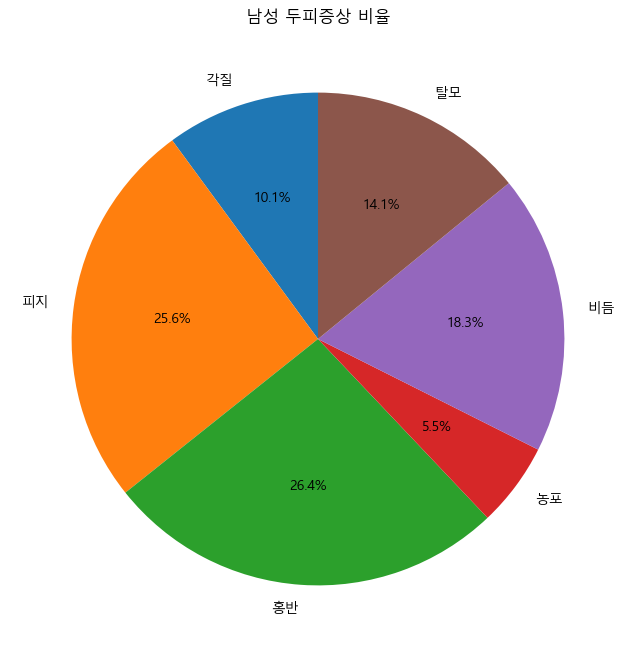

In [137]:
# 원형 그래프 그리기
plt.figure(figsize=(8, 8))
male_symptom_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

# 제목 추가 및 Y축 라벨 제거 (깔끔한 표현을 위해)
plt.title("남성 두피증상 비율")

Text(0.5, 1.0, '여성 두피증상 비율')

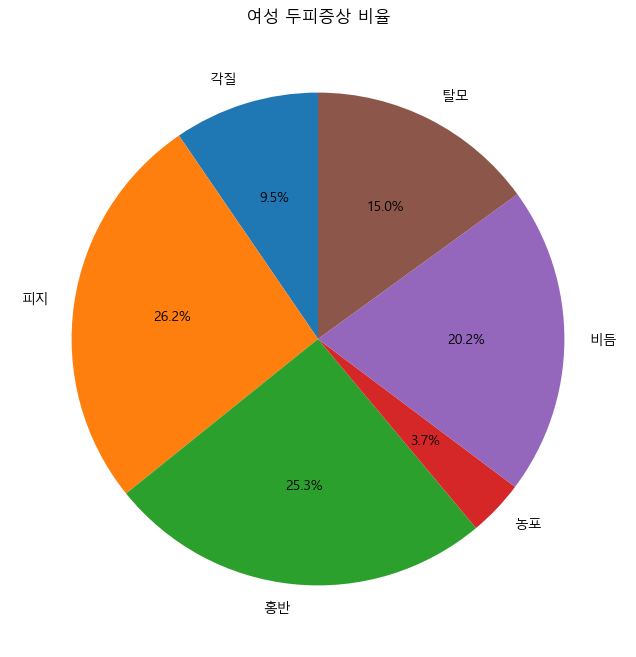

In [138]:
# 원형 그래프 그리기
plt.figure(figsize=(8, 8))
female_symptom_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

# 제목 추가 및 Y축 라벨 제거 (깔끔한 표현을 위해)
plt.title("여성 두피증상 비율")

### 펌 주기에 따른 두피 증상

In [139]:
symptom_by_perm = aggregated_data.groupby('펌_주기')[symptom_columns].sum()

In [140]:
symptom_by_perm

,각질,피지,홍반,농포,비듬,탈모
펌_주기,,,,,,
1~3회/연,2289,5891,5788,904,4589,3086
4~6회/연,881,2069,2129,369,1434,1233
7회 이상/연,207,475,489,85,318,293
하지않음,2882,8207,8085,1502,6091,4748



=== 펌 여부에 따른 두피 증상 분석 ===

전체 인구 18,154명 기준:

[각질]
펌함: 18.6% (3,377명)
펌안함: 15.9% (2,882명)
차이(펌함 - 펌안함): 2.7%p

[피지]
펌함: 46.5% (8,435명)
펌안함: 45.2% (8,207명)
차이(펌함 - 펌안함): 1.3%p

[홍반]
펌함: 46.3% (8,406명)
펌안함: 44.5% (8,085명)
차이(펌함 - 펌안함): 1.8%p

[농포]
펌함: 7.5% (1,358명)
펌안함: 8.3% (1,502명)
차이(펌함 - 펌안함): -0.8%p

[비듬]
펌함: 34.9% (6,341명)
펌안함: 33.6% (6,091명)
차이(펌함 - 펌안함): 1.3%p

[탈모]
펌함: 25.4% (4,612명)
펌안함: 26.2% (4,748명)
차이(펌함 - 펌안함): -0.8%p


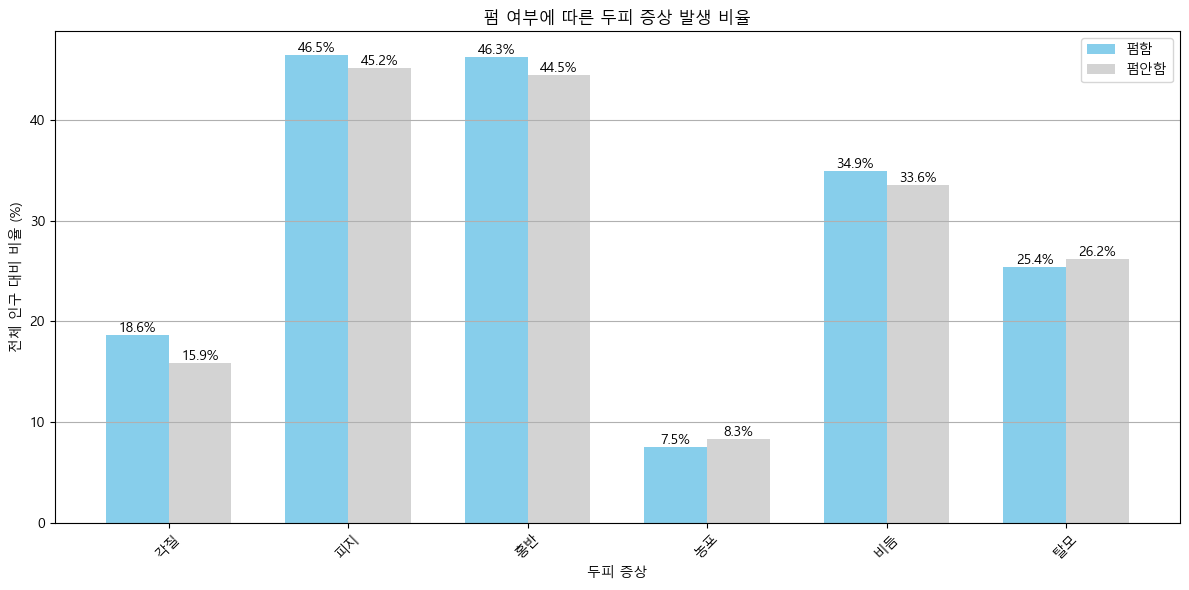

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
data = {
    '펌_주기': ['1~3회/연', '4~6회/연', '7회 이상/연', '하지않음'] * 6,
    '증상': ['각질'] * 4 + ['피지'] * 4 + ['홍반'] * 4 + ['농포'] * 4 + ['비듬'] * 4 + ['탈모'] * 4,
    '환자수': [2289, 881, 207, 2882,    # 각질
              5891, 2069, 475, 8207,    # 피지
              5788, 2129, 489, 8085,    # 홍반
              904, 369, 85, 1502,       # 농포
              4589, 1434, 318, 6091,    # 비듬
              3086, 1233, 293, 4748]    # 탈모
}

TOTAL_POPULATION = 18154  # 총 인구수 계산
df = pd.DataFrame(data)

# 증상별로 펌함/안함 그룹화
result = []
for symptom in df['증상'].unique():
    symptom_data = df[df['증상'] == symptom]
    
    # 펌함 (1~3회/연 + 4~6회/연 + 7회 이상/연)
    perm_yes = symptom_data[symptom_data['펌_주기'] != '하지않음']['환자수'].sum()
    # 펌안함
    perm_no = symptom_data[symptom_data['펌_주기'] == '하지않음']['환자수'].iloc[0]
    
    result.append({
        '증상': symptom,
        '펌함_환자수': perm_yes,
        '펌함_비율': round(perm_yes / TOTAL_POPULATION * 100, 1),
        '펌안함_환자수': perm_no,
        '펌안함_비율': round(perm_no / TOTAL_POPULATION * 100, 1)
    })

result_df = pd.DataFrame(result)

# 시각화
plt.figure(figsize=(12, 6))
bar_width = 0.35
symptoms = result_df['증상'].unique()
x = np.arange(len(symptoms))

# 막대 그래프 생성
bars1 = plt.bar(x - bar_width/2, result_df['펌함_비율'], bar_width, label='펌함', color='skyblue')
bars2 = plt.bar(x + bar_width/2, result_df['펌안함_비율'], bar_width, label='펌안함', color='lightgray')

# 막대 위에 값 표시
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height,
                f'{height:.1f}%',
                ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.xlabel('두피 증상')
plt.ylabel('전체 인구 대비 비율 (%)')
plt.title('펌 여부에 따른 두피 증상 발생 비율')
plt.xticks(x, symptoms, rotation=45)
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()  # 그래프 레이아웃 조정

# 상세 분석 결과 출력
print("\n=== 펌 여부에 따른 두피 증상 분석 ===")
print(f"\n전체 인구 {TOTAL_POPULATION:,}명 기준:")
for _, row in result_df.iterrows():
    print(f"\n[{row['증상']}]")
    print(f"펌함: {row['펌함_비율']}% ({int(row['펌함_환자수']):,}명)")
    print(f"펌안함: {row['펌안함_비율']}% ({int(row['펌안함_환자수']):,}명)")
    diff = row['펌함_비율'] - row['펌안함_비율']
    print(f"차이(펌함 - 펌안함): {diff:.1f}%p")

plt.show()

### 염색 주기에 따른 두피 증상

In [151]:
symptom_by_dye = aggregated_data.groupby('염색_주기')[symptom_columns].sum()

In [152]:
symptom_by_dye

,각질,피지,홍반,농포,비듬,탈모
염색_주기,,,,,,
1~3회/연,1183,3493,3345,544,2734,1891
4~6회/연,1162,3015,2982,481,2255,1682
7회 이상/연,1264,3336,3350,561,2327,2089
하지않음,2650,6798,6814,1274,5116,3698



=== 두피 증상별 분석 (전체 인구 18,154명 기준) ===

1. 각 증상의 전체 발생률:
피지: 91.7% (16642명)
홍반: 90.8% (16491명)
비듬: 68.5% (12432명)
탈모: 51.6% (9360명)
각질: 34.5% (6259명)
농포: 15.8% (2860명)

2. 증상별 염색 주기에 따른 비율:

[각질] - 전체 발생률: 34.5%
- 하지않음: 14.6% (2650명)
- 7회 이상/연: 7.0% (1264명)
- 1~3회/연: 6.5% (1183명)
- 4~6회/연: 6.4% (1162명)

[피지] - 전체 발생률: 91.7%
- 하지않음: 37.4% (6798명)
- 1~3회/연: 19.2% (3493명)
- 7회 이상/연: 18.4% (3336명)
- 4~6회/연: 16.6% (3015명)

[홍반] - 전체 발생률: 90.8%
- 하지않음: 37.5% (6814명)
- 7회 이상/연: 18.5% (3350명)
- 1~3회/연: 18.4% (3345명)
- 4~6회/연: 16.4% (2982명)

[농포] - 전체 발생률: 15.8%
- 하지않음: 7.0% (1274명)
- 7회 이상/연: 3.1% (561명)
- 1~3회/연: 3.0% (544명)
- 4~6회/연: 2.6% (481명)

[비듬] - 전체 발생률: 68.5%
- 하지않음: 28.2% (5116명)
- 1~3회/연: 15.1% (2734명)
- 7회 이상/연: 12.8% (2327명)
- 4~6회/연: 12.4% (2255명)

[탈모] - 전체 발생률: 51.6%
- 하지않음: 20.4% (3698명)
- 7회 이상/연: 11.5% (2089명)
- 1~3회/연: 10.4% (1891명)
- 4~6회/연: 9.3% (1682명)


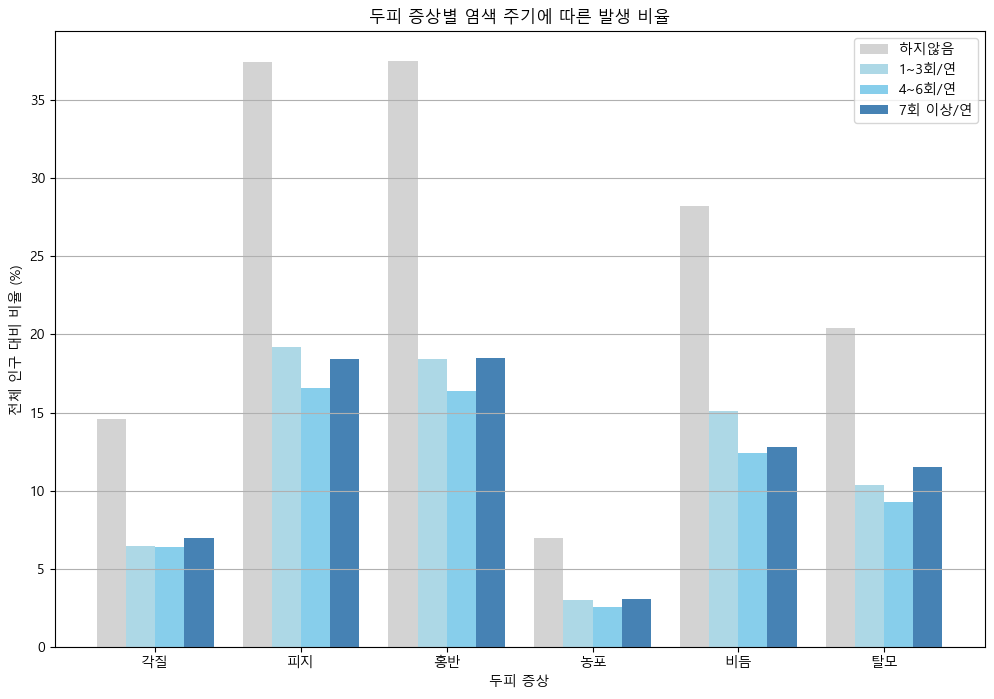

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비
data = {
    '염색_주기': ['1~3회/연', '4~6회/연', '7회 이상/연', '하지않음'] * 6,
    '증상': ['각질'] * 4 + ['피지'] * 4 + ['홍반'] * 4 + ['농포'] * 4 + ['비듬'] * 4 + ['탈모'] * 4,
    '환자수': [1183, 1162, 1264, 2650,  # 각질
              3493, 3015, 3336, 6798,  # 피지
              3345, 2982, 3350, 6814,  # 홍반
              544, 481, 561, 1274,     # 농포
              2734, 2255, 2327, 5116,  # 비듬
              1891, 1682, 2089, 3698]  # 탈모
}

TOTAL_POPULATION = 18154
df = pd.DataFrame(data)

# 각 증상별로 전체 인구 대비 비율 계산
df['비율'] = (df['환자수'] / TOTAL_POPULATION * 100).round(1)

# 결과 출력을 위한 피벗 테이블 생성
pivot_result = df.pivot(index='증상', columns='염색_주기', values=['환자수', '비율'])

# 각 증상별 전체 비율 계산
symptom_totals = df.groupby('증상')['환자수'].sum()
symptom_percentages = (symptom_totals / TOTAL_POPULATION * 100).round(1)

print("\n=== 두피 증상별 분석 (전체 인구 18,154명 기준) ===\n")
print("1. 각 증상의 전체 발생률:")
for symptom, percentage in symptom_percentages.sort_values(ascending=False).items():
    print(f"{symptom}: {percentage}% ({symptom_totals[symptom]}명)")

print("\n2. 증상별 염색 주기에 따른 비율:")
for symptom in df['증상'].unique():
    print(f"\n[{symptom}] - 전체 발생률: {symptom_percentages[symptom]}%")
    symptom_data = df[df['증상'] == symptom].sort_values('비율', ascending=False)
    for _, row in symptom_data.iterrows():
        print(f"- {row['염색_주기']}: {row['비율']}% ({row['환자수']}명)")

# 시각화
plt.figure(figsize=(12, 8))
symptoms = df['증상'].unique()
x = range(len(symptoms))
width = 0.2

plt.bar([i - width*1.5 for i in x], df[df['염색_주기'] == '하지않음']['비율'], width, label='하지않음', color='lightgray')
plt.bar([i - width/2 for i in x], df[df['염색_주기'] == '1~3회/연']['비율'], width, label='1~3회/연', color='lightblue')
plt.bar([i + width/2 for i in x], df[df['염색_주기'] == '4~6회/연']['비율'], width, label='4~6회/연', color='skyblue')
plt.bar([i + width*1.5 for i in x], df[df['염색_주기'] == '7회 이상/연']['비율'], width, label='7회 이상/연', color='steelblue')

plt.xlabel('두피 증상')
plt.ylabel('전체 인구 대비 비율 (%)')
plt.title('두피 증상별 염색 주기에 따른 발생 비율')
plt.xticks(x, symptoms)
plt.legend()
plt.grid(True, axis='y')


=== 염색 여부에 따른 두피 증상 분석 (수정) ===

1. 증상별 비교 (전체 인구 18,154명 기준):

[각질]
염색함: 19.9% (3609명)
염색안함: 14.6% (2650명)
차이(염색함 - 염색안함): 5.3%p

[피지]
염색함: 54.2% (9844명)
염색안함: 37.4% (6798명)
차이(염색함 - 염색안함): 16.8%p

[홍반]
염색함: 53.3% (9677명)
염색안함: 37.5% (6814명)
차이(염색함 - 염색안함): 15.8%p

[농포]
염색함: 8.7% (1586명)
염색안함: 7.0% (1274명)
차이(염색함 - 염색안함): 1.7%p

[비듬]
염색함: 40.3% (7316명)
염색안함: 28.2% (5116명)
차이(염색함 - 염색안함): 12.1%p

[탈모]
염색함: 31.2% (5662명)
염색안함: 20.4% (3698명)
차이(염색함 - 염색안함): 10.8%p


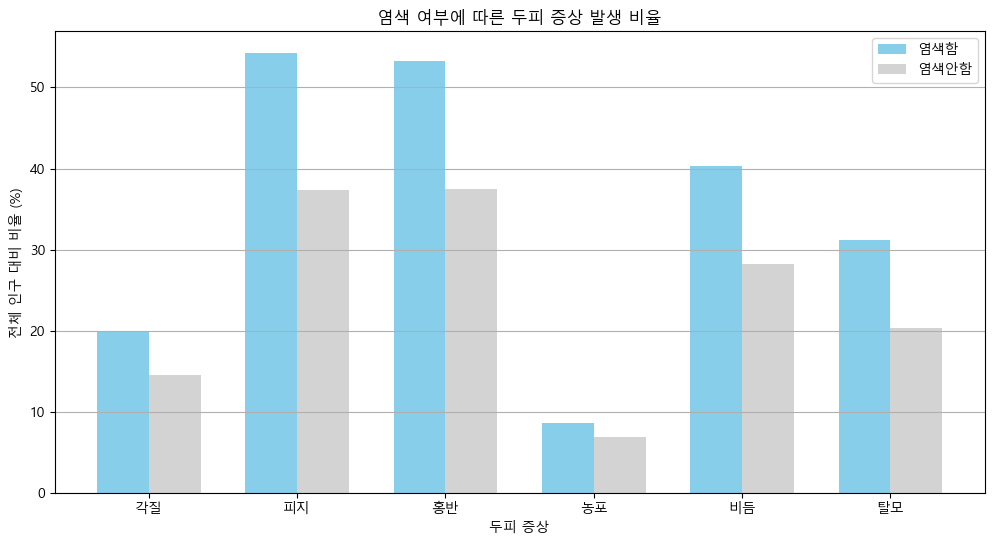

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
data = {
    '염색_주기': ['1~3회/연', '4~6회/연', '7회 이상/연', '하지않음'] * 6,
    '증상': ['각질'] * 4 + ['피지'] * 4 + ['홍반'] * 4 + ['농포'] * 4 + ['비듬'] * 4 + ['탈모'] * 4,
    '환자수': [1183, 1162, 1264, 2650,  # 각질
              3493, 3015, 3336, 6798,  # 피지
              3345, 2982, 3350, 6814,  # 홍반
              544, 481, 561, 1274,     # 농포
              2734, 2255, 2327, 5116,  # 비듬
              1891, 1682, 2089, 3698]  # 탈모
}

TOTAL_POPULATION = 18154
df = pd.DataFrame(data)

# 증상별로 염색함/안함 그룹화
result = []
for symptom in df['증상'].unique():
    symptom_data = df[df['증상'] == symptom]
    
    # 염색함 (1~3회/연 + 4~6회/연 + 7회 이상/연)
    dye_yes = symptom_data[symptom_data['염색_주기'] != '하지않음']['환자수'].sum()
    # 염색안함
    dye_no = symptom_data[symptom_data['염색_주기'] == '하지않음']['환자수'].iloc[0]
    
    result.append({
        '증상': symptom,
        '염색함_환자수': dye_yes,
        '염색함_비율': round(dye_yes / TOTAL_POPULATION * 100, 1),
        '염색안함_환자수': dye_no,
        '염색안함_비율': round(dye_no / TOTAL_POPULATION * 100, 1)
    })

result_df = pd.DataFrame(result)

# 시각화
plt.figure(figsize=(12, 6))
bar_width = 0.35
symptoms = df['증상'].unique()
x = np.arange(len(symptoms))

plt.bar(x - bar_width/2, result_df['염색함_비율'], bar_width, label='염색함', color='skyblue')
plt.bar(x + bar_width/2, result_df['염색안함_비율'], bar_width, label='염색안함', color='lightgray')

plt.xlabel('두피 증상')
plt.ylabel('전체 인구 대비 비율 (%)')
plt.title('염색 여부에 따른 두피 증상 발생 비율')
plt.xticks(x, symptoms)
plt.legend()
plt.grid(True, axis='y')

# 상세 분석 결과 출력
print("\n=== 염색 여부에 따른 두피 증상 분석 (수정) ===")
print("\n1. 증상별 비교 (전체 인구 18,154명 기준):")
for _, row in result_df.iterrows():
    print(f"\n[{row['증상']}]")
    print(f"염색함: {row['염색함_비율']}% ({row['염색함_환자수']}명)")
    print(f"염색안함: {row['염색안함_비율']}% ({row['염색안함_환자수']}명)")
    diff = row['염색함_비율'] - row['염색안함_비율']
    print(f"차이(염색함 - 염색안함): {diff:.1f}%p")


=== 염색 여부에 따른 두피 증상 분석 (수정) ===

1. 증상별 비교 (전체 인구 18,154명 기준):

[각질]
염색함: 19.9% (3609명)
염색안함: 14.6% (2650명)
차이(염색함 - 염색안함): 5.3%p

[피지]
염색함: 54.2% (9844명)
염색안함: 37.4% (6798명)
차이(염색함 - 염색안함): 16.8%p

[홍반]
염색함: 53.3% (9677명)
염색안함: 37.5% (6814명)
차이(염색함 - 염색안함): 15.8%p

[농포]
염색함: 8.7% (1586명)
염색안함: 7.0% (1274명)
차이(염색함 - 염색안함): 1.7%p

[비듬]
염색함: 40.3% (7316명)
염색안함: 28.2% (5116명)
차이(염색함 - 염색안함): 12.1%p

[탈모]
염색함: 31.2% (5662명)
염색안함: 20.4% (3698명)
차이(염색함 - 염색안함): 10.8%p


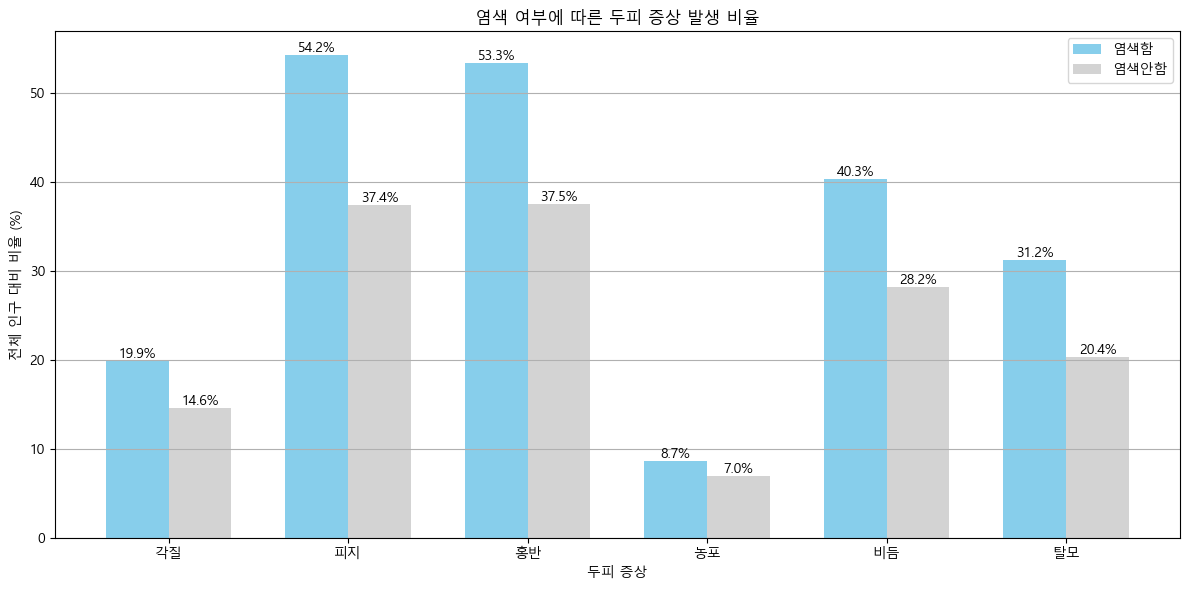

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
data = {
    '염색_주기': ['1~3회/연', '4~6회/연', '7회 이상/연', '하지않음'] * 6,
    '증상': ['각질'] * 4 + ['피지'] * 4 + ['홍반'] * 4 + ['농포'] * 4 + ['비듬'] * 4 + ['탈모'] * 4,
    '환자수': [1183, 1162, 1264, 2650,  # 각질
              3493, 3015, 3336, 6798,  # 피지
              3345, 2982, 3350, 6814,  # 홍반
              544, 481, 561, 1274,     # 농포
              2734, 2255, 2327, 5116,  # 비듬
              1891, 1682, 2089, 3698]  # 탈모
}
TOTAL_POPULATION = 18154
df = pd.DataFrame(data)

# 증상별로 염색함/안함 그룹화
result = []
for symptom in df['증상'].unique():
    symptom_data = df[df['증상'] == symptom]
    
    # 염색함 (1~3회/연 + 4~6회/연 + 7회 이상/연)
    dye_yes = symptom_data[symptom_data['염색_주기'] != '하지않음']['환자수'].sum()
    # 염색안함
    dye_no = symptom_data[symptom_data['염색_주기'] == '하지않음']['환자수'].iloc[0]
    
    result.append({
        '증상': symptom,
        '염색함_환자수': dye_yes,
        '염색함_비율': round(dye_yes / TOTAL_POPULATION * 100, 1),
        '염색안함_환자수': dye_no,
        '염색안함_비율': round(dye_no / TOTAL_POPULATION * 100, 1)
    })

result_df = pd.DataFrame(result)

# 시각화
plt.figure(figsize=(12, 6))
bar_width = 0.35
symptoms = df['증상'].unique()
x = np.arange(len(symptoms))

# 막대 그래프 생성
bars1 = plt.bar(x - bar_width/2, result_df['염색함_비율'], bar_width, label='염색함', color='skyblue')
bars2 = plt.bar(x + bar_width/2, result_df['염색안함_비율'], bar_width, label='염색안함', color='lightgray')

# 비율 텍스트 추가
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height,
                f'{height}%',
                ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

plt.xlabel('두피 증상')
plt.ylabel('전체 인구 대비 비율 (%)')
plt.title('염색 여부에 따른 두피 증상 발생 비율')
plt.xticks(x, symptoms)
plt.legend()
plt.grid(True, axis='y')

# 여백 조정 (텍스트가 잘리지 않도록)
plt.tight_layout()

# 상세 분석 결과 출력
print("\n=== 염색 여부에 따른 두피 증상 분석 (수정) ===")
print("\n1. 증상별 비교 (전체 인구 18,154명 기준):")
for _, row in result_df.iterrows():
    print(f"\n[{row['증상']}]")
    print(f"염색함: {row['염색함_비율']}% ({row['염색함_환자수']}명)")
    print(f"염색안함: {row['염색안함_비율']}% ({row['염색안함_환자수']}명)")
    diff = row['염색함_비율'] - row['염색안함_비율']
    print(f"차이(염색함 - 염색안함): {diff:.1f}%p")


=== 염색과 두피 증상 간의 카이제곱 검정 결과 ===

[각질]
카이제곱 통계량: 177.17
p-value: 0.0000000000
효과 크기(Cramer's V): 0.070
발생률 차이: 5.3%p

[피지]
카이제곱 통계량: 1028.62
p-value: 0.0000000000
효과 크기(Cramer's V): 0.168
발생률 차이: 16.8%p

[홍반]
카이제곱 통계량: 910.03
p-value: 0.0000000000
효과 크기(Cramer's V): 0.158
발생률 차이: 15.8%p

[농포]
카이제곱 통계량: 36.71
p-value: 0.0000000014
효과 크기(Cramer's V): 0.032
발생률 차이: 1.7%p

[비듬]
카이제곱 통계량: 591.49
p-value: 0.0000000000
효과 크기(Cramer's V): 0.128
발생률 차이: 12.1%p

[탈모]
카이제곱 통계량: 554.68
p-value: 0.0000000000
효과 크기(Cramer's V): 0.124
발생률 차이: 10.8%p


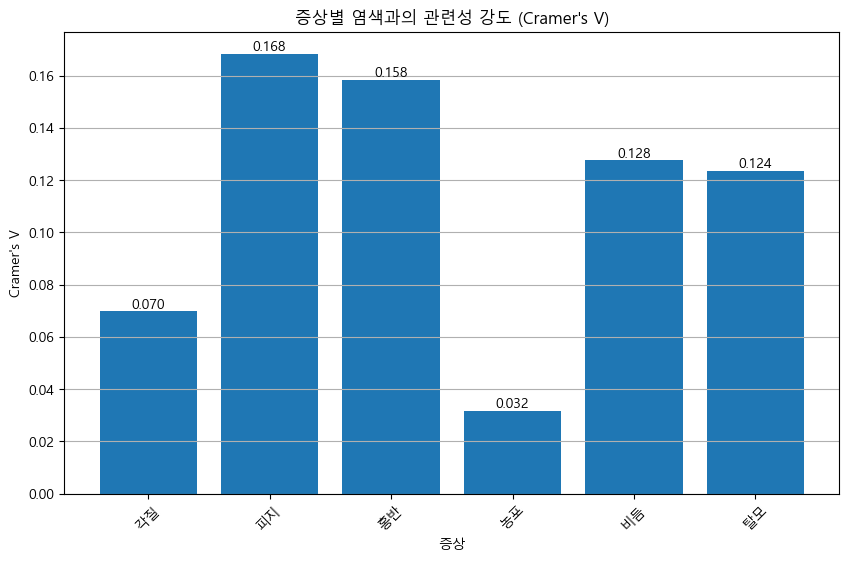

In [159]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# 데이터 준비
data = {
    '염색_주기': ['1~3회/연', '4~6회/연', '7회 이상/연', '하지않음'] * 6,
    '증상': ['각질'] * 4 + ['피지'] * 4 + ['홍반'] * 4 + ['농포'] * 4 + ['비듬'] * 4 + ['탈모'] * 4,
    '환자수': [1183, 1162, 1264, 2650,  # 각질
              3493, 3015, 3336, 6798,  # 피지
              3345, 2982, 3350, 6814,  # 홍반
              544, 481, 561, 1274,     # 농포
              2734, 2255, 2327, 5116,  # 비듬
              1891, 1682, 2089, 3698]  # 탈모
}

TOTAL_POPULATION = 18154
df = pd.DataFrame(data)

def perform_chi_square_test(symptom_data, symptom_name):
    # 염색함/안함으로 그룹화
    dye_yes = symptom_data[symptom_data['염색_주기'] != '하지않음']['환자수'].sum()
    dye_no = symptom_data[symptom_data['염색_주기'] == '하지않음']['환자수'].iloc[0]
    
    # 2x2 교차표 생성
    contingency_table = np.array([
        [dye_yes, TOTAL_POPULATION - dye_yes],
        [dye_no, TOTAL_POPULATION - dye_no]
    ])
    
    # 카이제곱 검정 수행
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # 검정력(Effect size) 계산 - Cramer's V
    n = np.sum(contingency_table)
    min_dim = min(contingency_table.shape) - 1
    cramer_v = np.sqrt(chi2 / (n * min_dim))
    
    return {
        '증상': symptom_name,
        'chi2': chi2,
        'p_value': p_value,
        'cramer_v': cramer_v,
        'dye_yes_count': dye_yes,
        'dye_no_count': dye_no,
        'dye_yes_ratio': dye_yes / TOTAL_POPULATION * 100,
        'dye_no_ratio': dye_no / TOTAL_POPULATION * 100
    }

# 각 증상별로 검정 수행
results = []
for symptom in df['증상'].unique():
    symptom_data = df[df['증상'] == symptom]
    result = perform_chi_square_test(symptom_data, symptom)
    results.append(result)

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)

# 결과 출력
print("\n=== 염색과 두피 증상 간의 카이제곱 검정 결과 ===")
for _, row in results_df.iterrows():
    print(f"\n[{row['증상']}]")
    print(f"카이제곱 통계량: {row['chi2']:.2f}")
    print(f"p-value: {row['p_value']:.10f}")
    print(f"효과 크기(Cramer's V): {row['cramer_v']:.3f}")
    print(f"발생률 차이: {row['dye_yes_ratio'] - row['dye_no_ratio']:.1f}%p")

# 효과 크기 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['증상'], results_df['cramer_v'])
plt.title('증상별 염색과의 관련성 강도 (Cramer\'s V)')
plt.xlabel('증상')
plt.ylabel('Cramer\'s V')
plt.xticks(rotation=45)
plt.grid(True, axis='y')

# 막대에 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

Cramer's V 해석 기준:  

0.1 미만: 무시할만한 관련성  
0.1 ~ 0.3: 약한 관련성  
0.3 ~ 0.5: 중간 정도의 관련성  
0.5 이상: 강한 관련성  

따라서 p-value가 매우 작게 나온 것은 통계적 오류가 아니라, 큰 표본 크기와 실제 존재하는 차이로 인한 결과입니다. 하지만 실제 관련성의 강도는 약하거나 중간 정도라고 해석할 수 있습니다.  

In [160]:
# 각질: 카이제곱 통계량은 177.17이며, 매우 낮은 p-value로 인해 염색 주기와 관련이 있다고 볼 수 있지만, 효과 크기(Cramer's V)가 0.070으로 작아 강한 관계는 아닙니다.
# 피지: 카이제곱 통계량이 1028.62로 크며, 효과 크기(Cramer's V)가 0.168로 중간 정도의 관계를 보여줍니다.
# 홍반: 카이제곱 통계량이 910.03이며, Cramer's V는 0.158로 피지와 비슷한 중간 정도의 관계를 보여줍니다.
# 농포: 카이제곱 통계량은 36.71로 낮으며, 효과 크기도 0.032로 거의 관련이 없다고 볼 수 있습니다.
# 비듬: 카이제곱 통계량이 591.49이고 Cramer's V가 0.128로, 중간 정도의 관계를 보입니다.
# 탈모: 카이제곱 통계량은 554.68이며, Cramer's V가 0.124로 비듬과 유사하게 중간 정도의 관계가 있습니다.
# 요약하자면, 피지와 홍반이 염색 주기와 가장 높은 관련성을 보여주고 있으며, 각질과 농포는 낮은 관련성을 보입니다.

### 나이에 따른 두피 증상

In [164]:
symptom_by_age = aggregated_data.groupby('나이')[symptom_columns].sum()

In [169]:
aggregated_data.groupby('나이')['unique_id'].count()

나이
0대       111
100대       1
10대      609
20대     4515
30대     4307
40대     3575
50대     3089
60대     1485
70대      373
80대       82
90대        7
Name: unique_id, dtype: int64

In [166]:
symptom_by_age.to_csv('./나이.csv', encoding='utf-8-sig')


=== 나이대별 두피 증상 유병률 분석 ===

1. 각 나이대별 증상 유병률 (100명 이상 표본):

0대 (전체 111명)
- 각질: 29.7% (33명)
- 피지: 82.0% (91명)
- 홍반: 76.6% (85명)
- 농포: 5.4% (6명)
- 비듬: 48.6% (54명)
- 탈모: 55.9% (62명)

10대 (전체 609명)
- 각질: 30.4% (185명)
- 피지: 93.1% (567명)
- 홍반: 86.2% (525명)
- 농포: 12.5% (76명)
- 비듬: 78.0% (475명)
- 탈모: 48.9% (298명)

20대 (전체 4515명)
- 각질: 30.4% (1372명)
- 피지: 93.9% (4240명)
- 홍반: 90.1% (4068명)
- 농포: 13.4% (603명)
- 비듬: 76.6% (3458명)
- 탈모: 48.2% (2176명)

30대 (전체 4307명)
- 각질: 36.3% (1564명)
- 피지: 91.2% (3927명)
- 홍반: 90.2% (3885명)
- 농포: 15.2% (653명)
- 비듬: 68.1% (2935명)
- 탈모: 43.0% (1850명)

40대 (전체 3575명)
- 각질: 35.6% (1272명)
- 피지: 91.0% (3253명)
- 홍반: 90.8% (3246명)
- 농포: 17.3% (620명)
- 비듬: 67.9% (2427명)
- 탈모: 47.8% (1709명)

50대 (전체 3089명)
- 각질: 35.1% (1083명)
- 피지: 91.5% (2827명)
- 홍반: 92.2% (2847명)
- 농포: 17.0% (526명)
- 비듬: 64.6% (1997명)
- 탈모: 59.3% (1833명)

60대 (전체 1485명)
- 각질: 37.6% (558명)
- 피지: 89.6% (1331명)
- 홍반: 93.6% (1390명)
- 농포: 18.2% (271명)
- 비듬: 56.9% (845명)
- 탈모: 70.7% (1050명)

70대 (전체 373명)
- 각질:

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '0대'),
  Text(1, 0, '10대'),
  Text(2, 0, '20대'),
  Text(3, 0, '30대'),
  Text(4, 0, '40대'),
  Text(5, 0, '50대'),
  Text(6, 0, '60대'),
  Text(7, 0, '70대')])

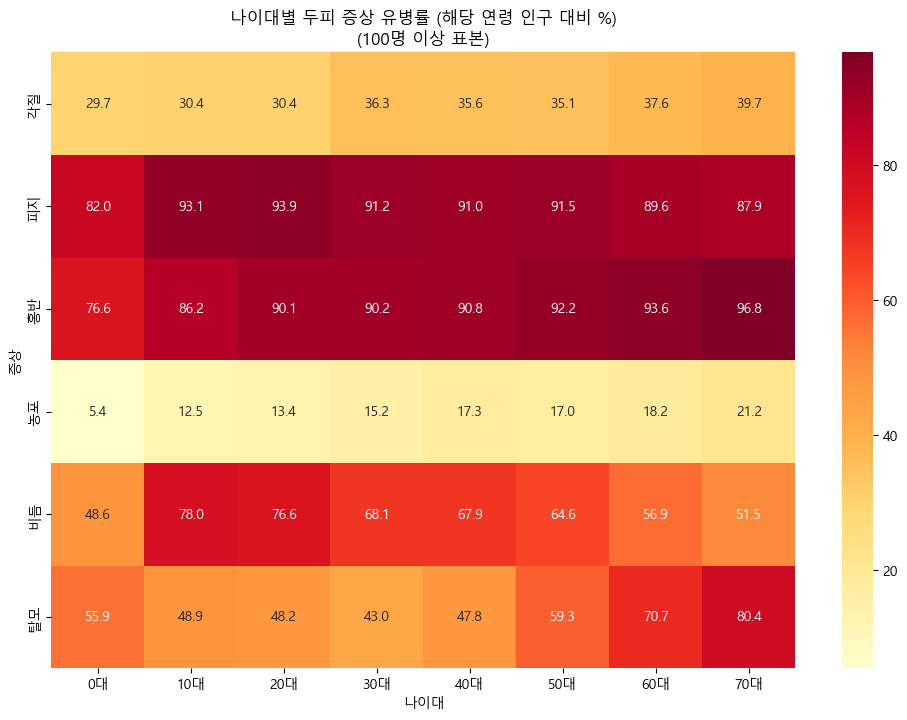

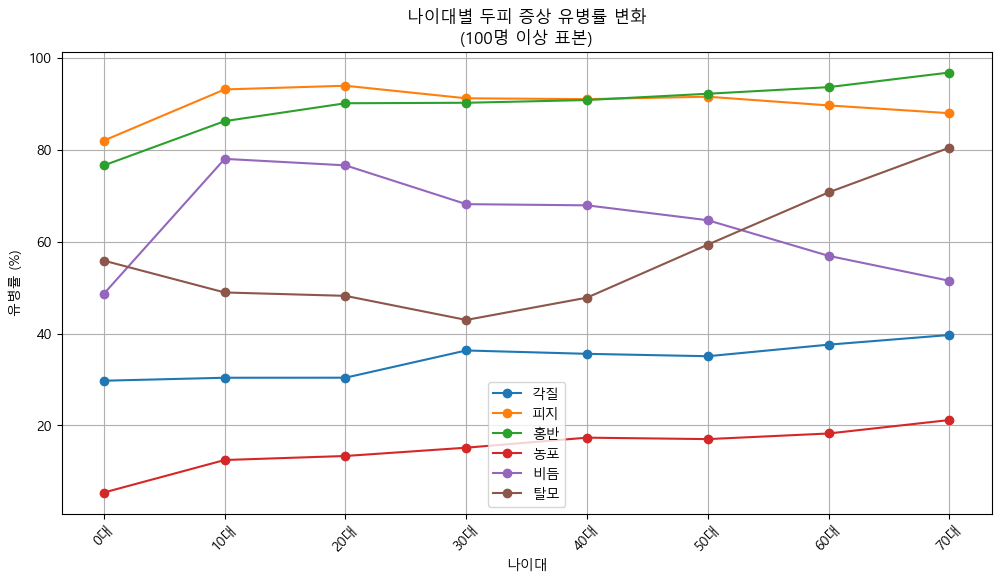

In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 준비
data = pd.DataFrame({
    '나이': ['0대', '100대', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대'],
    '각질': [33, 1, 185, 1372, 1564, 1272, 1083, 558, 148, 40, 3],
    '피지': [91, 0, 567, 4240, 3927, 3253, 2827, 1331, 328, 74, 4],
    '홍반': [85, 1, 525, 4068, 3885, 3246, 2847, 1390, 361, 77, 6],
    '비듬': [54, 0, 475, 3458, 2935, 2427, 1997, 845, 192, 46, 3],
    '탈모': [62, 1, 298, 2176, 1850, 1709, 1833, 1050, 300, 75, 6],
    '농포': [6, 0, 76, 603, 653, 620, 526, 271, 79, 22, 4]
})

# 나이대별 전체 인구수
population = {
    '0대': 111,
    '100대': 1,
    '10대': 609,
    '20대': 4515,
    '30대': 4307,
    '40대': 3575,
    '50대': 3089,
    '60대': 1485,
    '70대': 373,
    '80대': 82,
    '90대': 7
}

# 인덱스를 나이대로 설정
data.set_index('나이', inplace=True)

# 증상 칼럼 리스트
symptom_columns = ['각질', '피지', '홍반', '농포', '비듬', '탈모']

# 인구수 대비 비율 계산
ratio_df = pd.DataFrame(index=data.index)
for symptom in symptom_columns:
    ratio_df[symptom] = (data[symptom] / pd.Series(population)) * 100

# 100명 이상의 표본이 있는 나이대만 선택
valid_ages = [age for age, pop in population.items() if pop >= 100]
valid_ratio_df = ratio_df.loc[valid_ages]

# 히트맵 생성
plt.figure(figsize=(12, 8))
sns.heatmap(valid_ratio_df.T, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('나이대별 두피 증상 유병률 (해당 연령 인구 대비 %)\n(100명 이상 표본)')
plt.xlabel('나이대')
plt.ylabel('증상')

# 분석 결과 출력
print("\n=== 나이대별 두피 증상 유병률 분석 ===")
print("\n1. 각 나이대별 증상 유병률 (100명 이상 표본):")
for age in valid_ages:
    print(f"\n{age} (전체 {population[age]}명)")
    for symptom in symptom_columns:
        ratio = ratio_df.loc[age, symptom]
        cases = data.loc[age, symptom]
        print(f"- {symptom}: {ratio:.1f}% ({cases}명)")

print("\n2. 증상별 최대 유병률 (100명 이상 표본):")
for symptom in symptom_columns:
    max_ratio = valid_ratio_df[symptom].max()
    max_age = valid_ratio_df[symptom].idxmax()
    cases = data.loc[max_age, symptom]
    print(f"{symptom}: {max_age}에서 {max_ratio:.1f}% ({cases}명)")

# 선 그래프로 추세 시각화
plt.figure(figsize=(12, 6))
for symptom in symptom_columns:
    plt.plot(valid_ratio_df.index, valid_ratio_df[symptom], 
             marker='o', label=symptom)
plt.title('나이대별 두피 증상 유병률 변화\n(100명 이상 표본)')
plt.xlabel('나이대')
plt.ylabel('유병률 (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)